<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We'll-convert-Gender-to-int-type-by-replacing-Male-as-1-and-Female-as-0" data-toc-modified-id="We'll-convert-Gender-to-int-type-by-replacing-Male-as-1-and-Female-as-0-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>We'll convert Gender to int type by replacing Male as 1 and Female as 0</a></span></li></ul></li></ul></li><li><span><a href="#What-about-LabelEncoder?-->-Only-for-Y-(label)-?" data-toc-modified-id="What-about-LabelEncoder?-->-Only-for-Y-(label)-?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What about LabelEncoder? -&gt; Only for Y (label) ?</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualization</a></span></li></ul></div>

In [1]:
import os
import pandas as pd # for data analysis and manipulation
import numpy as np # for mathematical operations
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization

In [2]:
os.chdir(r"D:\Datasets")

In [3]:
df = pd.read_csv("iphone_purchase_records.csv")
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


Purchase iPhone= 0 => Has an iPhone

Purchase iPhone= 1 => Doesn't have an iPhone

In [4]:
df.dtypes

Gender             object
Age                 int64
Salary              int64
Purchase Iphone     int64
dtype: object

#### We'll convert Gender to int type by replacing Male as 1 and Female as 0

## What about LabelEncoder? -> Only for Y (label) ?

In [5]:
df["Gender"] = df["Gender"].replace(["Male"], value= 1)
df["Gender"] = df["Gender"].replace(["Female"], value= 0)

In [6]:
df

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [7]:
df.describe()

,Gender,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   Salary           400 non-null    int64
 3   Purchase Iphone  400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


We don't have any Null values

## Visualization

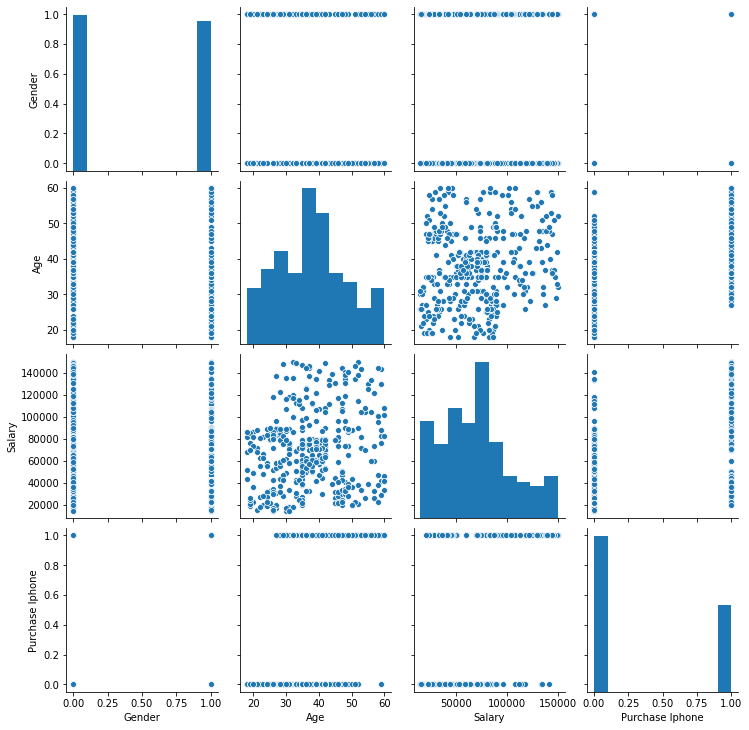

In [9]:
sns.pairplot(df)

But our data has all numbers now with different units i.e age is in years, salary is some currency and as kNN is a distance based algorithm, so we need to scale the data first before applying any further actions.

In [10]:
df1 = df.copy()

In [11]:
#Predictors df:
X= df1[["Gender", "Age", "Salary"]]
print(X)
# df with label:  Purchase Iphone(Target)
y = df1["Purchase Iphone"]
print(y)

     Gender  Age  Salary
0         1   19   19000
1         1   35   20000
2         0   26   43000
3         0   27   57000
4         1   19   76000
..      ...  ...     ...
395       0   46   41000
396       1   51   23000
397       0   50   20000
398       1   36   33000
399       0   49   36000

[400 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64


In [13]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, stratify= y, random_state= 0)

# classification problem -> prefer to use stratification
# random_state -> like seed function -> reproduce/replicate same result


In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [15]:
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.fit_transform(X_test)

In [16]:
X_train

array([[-0.96720415,  0.21949759,  0.16166651],
       [-0.96720415,  0.21949759,  0.07369804],
       [ 1.03390789, -1.29864134, -1.36312043],
       [ 1.03390789,  1.8325202 ,  0.13234369],
       [-0.96720415, -0.82422293, -1.2165063 ],
       [-0.96720415, -1.01399029,  0.77744585],
       [-0.96720415, -0.16003715, -0.45411283],
       [-0.96720415, -0.91910661, -0.74734108],
       [-0.96720415,  0.40926495,  0.27895782],
       [-0.96720415,  0.02973022,  1.24661106],
       [ 1.03390789,  0.1246139 ,  1.89171323],
       [-0.96720415, -0.06515346, -0.36614435],
       [-0.96720415, -0.4446882 , -0.5420813 ],
       [ 1.03390789, -0.16003715, -0.51275848],
       [-0.96720415,  0.97856705, -1.01124652],
       [ 1.03390789,  0.97856705,  0.13234369],
       [ 1.03390789, -1.77305976, -1.48041173],
       [ 1.03390789,  2.11717125, -0.80598674],
       [ 1.03390789,  1.92740389,  2.18494149],
       [-0.96720415,  1.35810179, -1.42176608],
       [-0.96720415, -1.29864134, -1.245

In [17]:
X_test

array([[-1.02020406, -0.24956151, -0.39857365],
       [ 0.98019606,  0.43283325,  0.98802602],
       [ 0.98019606,  0.04289338, -0.28056517],
       [-1.02020406, -0.63950138,  1.40105571],
       [-1.02020406,  0.23786332,  2.1091066 ],
       [ 0.98019606, -0.24956151, -0.45757789],
       [ 0.98019606, -1.1269262 ,  0.45698785],
       [-1.02020406,  1.21271297, -1.49015211],
       [ 0.98019606, -0.24956151, -0.51658213],
       [ 0.98019606, -1.4193811 , -0.22156093],
       [ 0.98019606, -0.05459158,  2.16811084],
       [-1.02020406, -0.63950138,  0.54549421],
       [-1.02020406, -0.34704648, -0.81160334],
       [ 0.98019606, -0.93195627, -1.13612666],
       [-1.02020406,  1.01774304,  0.75200905],
       [-1.02020406, -1.02944124, -1.16562879],
       [ 0.98019606,  0.53031821,  1.72557903],
       [ 0.98019606, -0.24956151, -0.92961182],
       [-1.02020406, -0.93195627, -0.33956941],
       [-1.02020406,  0.92025808, -0.69359486],
       [-1.02020406,  1.11522801, -0.929

Let's visualize again now after scaling:

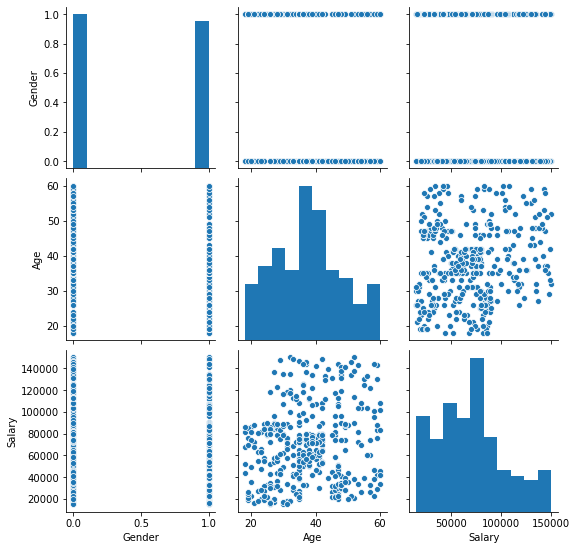

In [18]:
sns.pairplot(X)

In [19]:
df.corr()

,Gender,Age,Salary,Purchase Iphone
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
Salary,-0.060435,0.155238,1.000000,0.362083
Purchase Iphone,-0.042469,0.622454,0.362083,1.000000


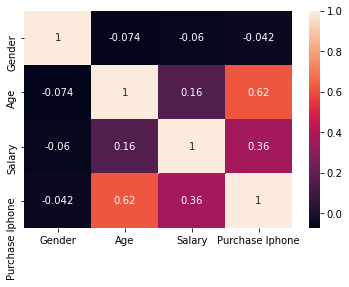

In [19]:
sns.heatmap(df.corr(), annot= True)

Age and Purchase Iphone have the highest correlation= 0.62 followed by
Salary and Purchase Iphone= 0.36

In [20]:
X_train

array([[-0.96720415,  0.21949759,  0.16166651],
       [-0.96720415,  0.21949759,  0.07369804],
       [ 1.03390789, -1.29864134, -1.36312043],
       [ 1.03390789,  1.8325202 ,  0.13234369],
       [-0.96720415, -0.82422293, -1.2165063 ],
       [-0.96720415, -1.01399029,  0.77744585],
       [-0.96720415, -0.16003715, -0.45411283],
       [-0.96720415, -0.91910661, -0.74734108],
       [-0.96720415,  0.40926495,  0.27895782],
       [-0.96720415,  0.02973022,  1.24661106],
       [ 1.03390789,  0.1246139 ,  1.89171323],
       [-0.96720415, -0.06515346, -0.36614435],
       [-0.96720415, -0.4446882 , -0.5420813 ],
       [ 1.03390789, -0.16003715, -0.51275848],
       [-0.96720415,  0.97856705, -1.01124652],
       [ 1.03390789,  0.97856705,  0.13234369],
       [ 1.03390789, -1.77305976, -1.48041173],
       [ 1.03390789,  2.11717125, -0.80598674],
       [ 1.03390789,  1.92740389,  2.18494149],
       [-0.96720415,  1.35810179, -1.42176608],
       [-0.96720415, -1.29864134, -1.245

In [21]:
y_train

122    0
228    0
178    0
275    1
93     0
      ..
175    0
206    1
64     0
262    1
330    0
Name: Purchase Iphone, Length: 300, dtype: int64

In [28]:
sc_df = pd.DataFrame(X_train, columns= ("Gender", "Age","Salary"))
y_train = list(y_train)
sc_df["Purchase Iphone"] = y_train
sc_df # Scaled Trainind data 

,Gender,Age,Salary,Purchase Iphone
0,-0.967204,0.219498,0.161667,0
1,-0.967204,0.219498,0.073698,0
2,1.033908,-1.298641,-1.363120,0
3,1.033908,1.832520,0.132344,1
4,-0.967204,-0.824223,-1.216506,0
...,...,...,...,...
295,-0.967204,-1.393525,-1.216506,0
296,-0.967204,1.642753,1.774422,1
297,-0.967204,2.022288,0.396249,0
298,-0.967204,1.642753,1.627808,1


In [29]:
# We will now find correlation using the scaled training data

sc_df.corr()

,Gender,Age,Salary,Purchase Iphone
Gender,1.000000,-0.052257,-0.093996,-0.023905
Age,-0.052257,1.000000,0.179203,0.620340
Salary,-0.093996,0.179203,1.000000,0.389923
Purchase Iphone,-0.023905,0.620340,0.389923,1.000000


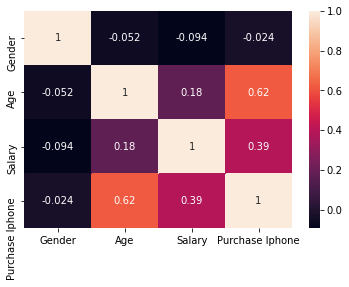

In [30]:
sns.heatmap(sc_df.corr(), annot= True)

In [31]:
# Correlation b/w Age & Purchase Iphone is same as before: 0.62
# Correlation b/w Salary & Purchase Iphone is increased to 0.39

In [24]:
# # df with label:  Purchase Iphone(Target)
# y = df1["Purchase Iphone"]
# y

In [25]:
# #importing train_test_split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)

In [32]:
#  importing KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier

Now, we have two metrics for the distance method:
    1. For Euclidean distance, metric = minkowski and p=2
    
    1. For Manhattan distance, metric = minkowski and p=1

In [33]:
# Using Euclidean Distance as our metric here:

knn= KNeighborsClassifier(n_neighbors= 5, metric= "minkowski", p= 2)
knn.fit(X_train, y_train) # training the model with k= 5

KNeighborsClassifier()

In [34]:
# Prediction: using test data

y_pred= knn.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [35]:
knn.predict([[1,51,23000]])

array([1])

In [36]:
# Confusion Matrix
from sklearn import metrics
conf = metrics.confusion_matrix(y_test, y_pred)
print(conf)

[[58  6]
 [ 4 32]]


|          	| NEGATIVE 	| POSITIVE 	| -> PREDICTED

|----------	|----------	|----------	|

| NEGATIVE 	| TN       	| FP       	|

| POSITIVE 	| FN       	| TP       	|

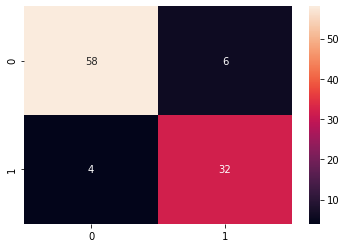

In [37]:
sns.heatmap(conf, annot= True)

In [38]:
# Checking accuracy on Training set

train_accuracy = knn.score(X_train, y_train)
train_accuracy

0.93

In [39]:
# Accuracy on Test data:

test_accuracy = knn.score(X_test, y_test)
test_accuracy

0.9

In [40]:
## Accuracy = (TP+TN)/(TP+FP+TN+FN)

test_acc= metrics.accuracy_score(y_test, y_pred) # this gives same result as above code. Accuracy metrics work only for test data
test_acc

0.9

In [41]:
## Precision = Positive Predicted Value = TP/(TP+FP)

precision= metrics.precision_score(y_test, y_pred)
precision

0.8421052631578947

In [42]:
## Recall = True Positive Rate = TP/(TP+FN)

recall= metrics.recall_score(y_test, y_pred)
recall

0.8888888888888888

Accuracy of 90%
Incorrect Predictions = FN+FP = 4+6 = 10

Train and Test accuracy is quite high. This might be a case of Overfitting.
Let's see if we can select a better k value such that it is neither a case of Overfitting nor Underfitting.
Let's observe how the kNN Classifier performs on the training and testing data for different k values (1 to 15)
We'll see the accuracy  for train and test data for k values from 1 to 15

In [43]:
train_accuracy= []
test_accuracy= []
for neighbors in range(1,16):
    knn= KNeighborsClassifier(n_neighbors= neighbors, metric= "minkowski", p= 2)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

# print(train_accuracy)
# print(test_accuracy)

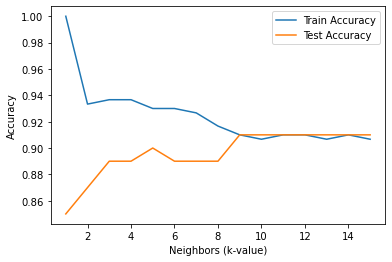

In [44]:
##Let’s plot the training and test data accuracy against n_neighbors together:

plt.plot(range(1,16), train_accuracy, label= "Train Accuracy")
plt.plot(range(1,16), test_accuracy, label= "Test Accuracy")
plt.xlabel("Neighbors (k-value)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see initially, when k<9, Train accuracy is quite higher than the Test accuracy which is a case of Overfitting.
When k>9, then it's visible that Train Accuracy is lower than the Test Accuracy which is a case of Underfitting.
The Train and Test Accuracy come closer around k=9. 
Test accuracy is visibly high ast k=9 along with Train Accuracy, which is the spot we're intersted in and hence, it gives us the Optimal k Value = 9

[[58  6]
 [ 3 33]]


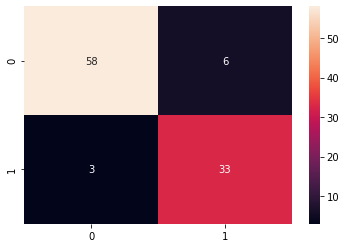

In [45]:
#For k= 9:

knn= KNeighborsClassifier(n_neighbors= 9, metric= "minkowski", p= 2)
knn.fit(X_train, y_train) # training the model with k= 3

# Prediction: using test data
y_pred= knn.predict(X_test)
# y_pred

# Confusion Matrix
from sklearn import metrics
conf = metrics.confusion_matrix(y_test, y_pred)
print(conf)

sns.heatmap(conf, annot= True)

In [47]:
# Checking accuracy on Training set

train_accuracy = knn.score(X_train, y_train)
train_accuracy

0.91

In [48]:
# Checking accuracy on Test set

test_accuracy = knn.score(X_test, y_test)
test_accuracy

0.91

91% accuracy which is quite good
when k was = 5, train accuracy was= 90%